C:\Users\RIA MALHOTRA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


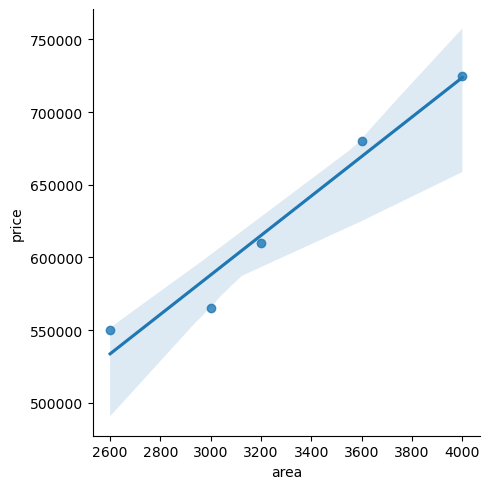

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
df=pd.read_csv("homePrice.csv")
sns.lmplot(x='area',y='price',data=df)


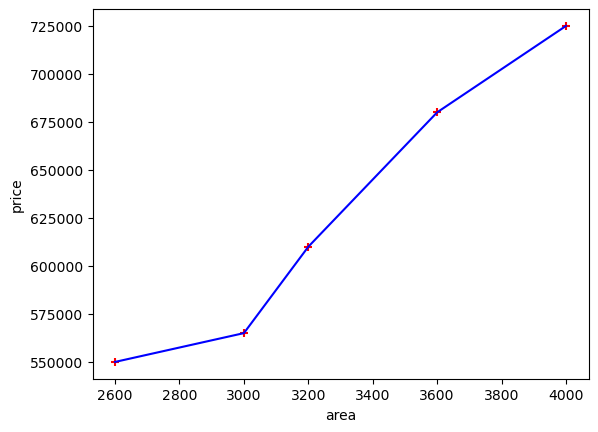

In [6]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df['area'],df.price,color='red',marker='+')
plt.plot(df['area'],df.price,color='blue')

In [9]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df['price'])

LinearRegression()

In [10]:
m=reg.coef_
m
#m is the array therefore every output will be generated in array

array([135.78767123])

In [12]:
b=reg.intercept_
b

180616.43835616432

In [13]:
3300*m+b

array([628715.75342466])

In [14]:
reg.predict([[3300]])

C:\Users\RIA MALHOTRA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [16]:
from sklearn.metrics import r2_score
y_original=df.price
y_predicted=reg.predict(df[['area']])
r_square=r2_score(y_original,y_predicted)
print('model accuracy is: ',r_square*100)
#another way
print('model accuracy is: ',reg.score(df[['area']],df['price'])*100)

model accuracy is:  95.84301138199486
model accuracy is:  95.84301138199486


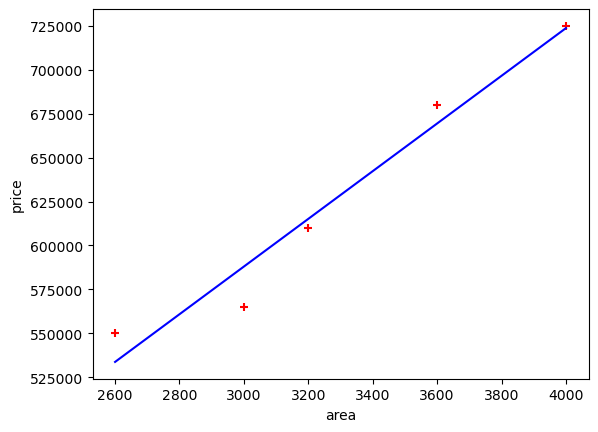

In [19]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df['area'],df.price,color='red',marker='+')
plt.plot(df['area'],reg.predict(df[['area']]),color='blue')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score #extra becuase already imported once
x_train,x_test,y_train,y_test=train_test_split(df['area'],df.price,test_size=0.3)
#these variables are 1D 
#in order to use the fit method reshape it to 2 D by reshape method.
reg.fit(x_train.values.reshape(-1,1),y_train)
y_pred=reg.predict(x_test.values.reshape(-1,1))
r_square=r2_score(y_test,y_pred)
print ('model accuracy is: ',r_square*100) #multiply with 100 to get result in % rather than 0.1 or any decimal value


model accuracy is:  -704.0123456790125


In [29]:
area_df=pd.read_csv("areas.csv") #dataframe always be 2D
p=reg.predict(area_df)
p

C:\Users\RIA MALHOTRA\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 297916.66666667,  369791.66666667,  484791.66666667,
        663041.66666667,  746416.66666667,  809666.66666667,
        943354.16666667,  651541.66666667,  836979.16666667,
        484791.66666667, 1447916.66666667, 1174791.66666667])

In [30]:
area_df['prices']=p
area_df

,area,prices
0,1000,2.979167e+05
1,1500,3.697917e+05
2,2300,4.847917e+05
3,3540,6.630417e+05
4,4120,7.464167e+05
5,4560,8.096667e+05
6,5490,9.433542e+05
7,3460,6.515417e+05
8,4750,8.369792e+05
9,2300,4.847917e+05
